# Logistic Regression

**What it is:**

* A statistical method used for **binary classification** tasks. 
* Predicts the probability of an event occurring (e.g., yes/no, true/false, 1/0).
* Uses the **sigmoid function** to map inputs to a probability between 0 and 1.

**How it works:**

1. **Takes input features:** These are the variables you believe are related to the outcome you're trying to predict.
2. **Calculates a linear combination:**  It combines the input features with weights (coefficients) to create a linear equation.
3. **Applies the sigmoid function:** This transforms the linear output into a probability between 0 and 1.
4. **Makes predictions:** If the probability is above a certain threshold (e.g., 0.5), the model predicts one class; otherwise, it predicts the other.

**Applications:**

* **Finance:** Credit scoring, fraud detection
* **Healthcare:** Disease prediction, risk assessment
* **Marketing:** Customer churn prediction, targeted advertising
* **Social Sciences:** Predicting voting behavior, analyzing survey data

**In essence:** Logistic regression provides a probabilistic framework for making predictions about binary outcomes. It's a valuable tool for understanding the relationship between predictor variables and the likelihood of a particular event occurring.

**Key Points:**

* **Binary Classification:** Focuses on predicting outcomes with two possible values.
* **Probability Estimation:** Estimates the probability of an event occurring.
* **Sigmoid Function:** Core component that maps inputs to probabilities.

**Assumptions:**

* **Data Accuracy:** The data is assumed to be correct and free from errors.
* **Data Consistency:** Data formats are assumed to be consistent (e.g., date formats).
* **Data Completeness:** No assumptions are made about missing values (like the `None` entries).
* **Data Independence:** Each data point is assumed to be independent of others.

These are general assumptions. Specific assumptions will depend on the intended use of the data.

In [1]:
# Import libraries
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score ,accuracy_score , precision_score , recall_score , f1_score ,confusion_matrix , classification_report

In [46]:
# data load titanic
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
# preprocessing
df = df.drop(['deck' ] , axis=1)
# df = pd.get_dummies(df , drop_first=True)
# impute missing values 
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
# impute missing values in embark and embarked_town
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# encode the categorical columns using for loop where object and category datatypes are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [48]:
# X and y
X = df.drop('survived' , axis=1)
y = df['survived']

In [49]:
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [50]:
# Model 
model = LogisticRegression()
model.fit(X_train , y_train)

/home/data-scientist/miniconda3/envs/python_ml/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#predict
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0])

In [55]:
# evaluate
print('Accuracy score: ',accuracy_score(y_test , y_pred))
print('Recall score: ',recall_score(y_test , y_pred))
print('Precision score: ',precision_score(y_test , y_pred))
print('F1 score: ',f1_score(y_test , y_pred))
print('Confusion matrix: \n',confusion_matrix(y_test , y_pred))
print('Classification report: \n',classification_report(y_test , y_pred))

Accuracy score:  1.0
Recall score:  1.0
Precision score:  1.0
F1 score:  1.0
Confusion matrix: 
 [[113   0]
 [  0  66]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        66

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



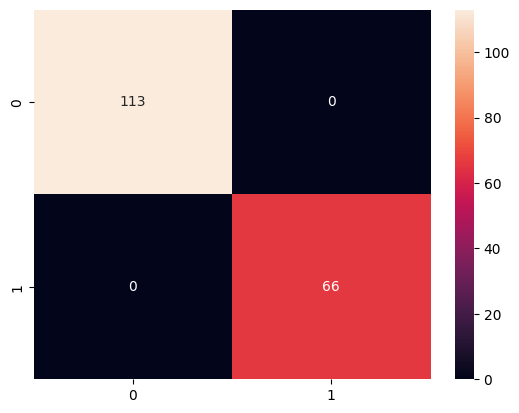

In [57]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True ,fmt='d')
plt.show()

In [58]:
# save the model
import pickle
pickle.dump(model , open('logistic_regression.pkl_02' , 'wb'))